## Topic Modeling Exploration with Gensim preprocessing 
- Data Science Positions 
Problem Statement:

Data Science is a new field and there is an influx of talent in this field generated by range of training and courses offered by both academic and professional institutions.  Data Science needs of the organizations, and hence the talent and experience requirements, also vary by industry.  
1.	There is an opportunity to assist both the candidates and the organizations to find the best match for their needs leveraging Machine Learning algorithms.  
a.	There is also an opportunity to further this by making recommendations to candidates on modifications in their profiles that would increase their matches with job postings.  
2.	Likewise, there is an opportunity to suggest recommendations to organizations which will increase their target talent profile (example, gender coded words) and their likelihood of finding the right matches for their requirements. 


In [136]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

pd.set_option('max_columns', 400)
pd.set_option('max_rows', 400)
# Set the colwidth to check the text
pd.set_option("display.max_colwidth", 600)

from nltk import everygrams, word_tokenize, RegexpTokenizer
import nltk.corpus as corpus
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import itertools as it
import matplotlib.pyplot as plt
from IPython.display import HTML
plt.style.use('ggplot')
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [137]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px



In [138]:
# load datasets 
df = pd.read_csv('./dataset/data_scientist_us_dataset.csv')

In [139]:
df.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23438c,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,"Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse professionals at Farmers to acquire skills on the job and apply your learned knowledge to future roles at Farmers. Farmers Insurance also offers extensive training opportunities through the award winning University of Farmers named by Training magazine amongst top 10 corporate training units in the world. Start your career at Farmers today!\n\nJob Summary\n\nThe Enterprise Data Scientist I will be a valuable part of the Data Science team who provide statistical analysis, modeling, and vis ualizati...",Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientist-Luxoft-USA-Inc-Middletown-NJ-07748/newageny/802263,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,"We have an immediate opening for a Sharp Data Scientist with a strong Mathematical/Statistical background to work on various initiatives in a Huge data environment. Will be looking at various formats of Data dealing with Billing Fraud Patterns using various software and modeling techniques. The candidate should have a minimum of 3 years of solid work experience in a professional organization/corporation using Python, SQL, Python libraries, Machine Learning Algorithms ( i.e. Decision Tree, Random Forest, Logistic Regression, etc.) should have strong Python skills. Additional experience with...",Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientist-Cincinnati-Bell-Technology-Solutions-New-York-NY-10001/10119424/464780,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,"Candidates should have the following background, skills and characteristics: Experience developing analytic applications using Java/Scala and related technologies in the Spark/Hadoop ecosystem Seasoned experience with Big Data programming frameworks, such as Apache Spark and Kafka Expert-level proficiency in Scala and Java is must Experience in machine learning techniques, large scale optimization and building/supporting production ML systems is a big plus Bachelor’s degree in a quantitative discipline required (masters or PhD preferred)",Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead205f2,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,"Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors build better financial futures. As a fiduciary to investors and a leading provider of financial technology, our clients turn to us for the solutions they need when planning for their most important goals. As of December 31, 2018, the firm managed approximately $5.98 trillion in assets on behalf of investors worldwide. For additional information on BlackRock, please visit www.blackrock.com | Twitter: @blackrock | Blog: www.blackrockblog.com | LinkedIn: www.linkedin.com/company/blackrock.\n\nJob ...",Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-scientist-charlotte-nc-us-cybercoders/205114316,Senior Data 

In [140]:
df.shape

(10000, 22)

In [141]:
df['job_description'][0]

"Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse professionals at Farmers to acquire skills on the job and apply your learned knowledge to future roles at Farmers. Farmers Insurance also offers extensive training opportunities through the award winning University of Farmers named by Training magazine amongst top 10 corporate training units in the world. Start your career at Farmers today!\n\nJob Summary\n\nThe Enterprise Data Scientist I will be a valuable part of the Data Science team who provide statistical analysis, modeling, and vis ualization services for all lines of business and all shared service functions at Farmers Insurance Group. The Data Scientist 1 will work on end to end solutions as part of a team. They will design innovative analytic models and will be responsible for pulling and cleaning datasets, evaluating models, and presenting results to internal teams.\n\nEssential Job Functions\n\nExtract data from a variety of sourc

In [142]:
df.isnull().sum()

crawl_timestamp             0
url                         0
job_title                   0
category                  882
company_name                1
city                      249
state                     416
country                     0
inferred_city            1020
inferred_state            516
inferred_country          495
post_date                   0
job_description             0
job_type                    0
salary_offered           9403
job_board                 690
geo                       700
cursor                      0
contact_email           10000
contact_phone_number     9584
uniq_id                     0
html_job_description     8401
dtype: int64

In [143]:
# Filter the relevant features
df = df[['job_title','job_description','company_name']]

In [144]:
df.shape

(10000, 3)

In [145]:
df.isnull().sum()

job_title          0
job_description    0
company_name       1
dtype: int64

In [146]:
df.head(5)

,job_title,job_description,company_name
0,Enterprise Data Scientist I,"Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse professionals at Farmers to acquire skills on the job and apply your learned knowledge to future roles at Farmers. Farmers Insurance also offers extensive training opportunities through the award winning University of Farmers named by Training magazine amongst top 10 corporate training units in the world. Start your career at Farmers today!\n\nJob Summary\n\nThe Enterprise Data Scientist I will be a valuable part of the Data Science team who provide statistical analysis, modeling, and vis ualizati...",Farmers Insurance Group
1,Data Scientist,"We have an immediate opening for a Sharp Data Scientist with a strong Mathematical/Statistical background to work on various initiatives in a Huge data environment. Will be looking at various formats of Data dealing with Billing Fraud Patterns using various software and modeling techniques. The candidate should have a minimum of 3 years of solid work experience in a professional organization/corporation using Python, SQL, Python libraries, Machine Learning Algorithms ( i.e. Decision Tree, Random Forest, Logistic Regression, etc.) should have strong Python skills. Additional experience with...",Luxoft USA Inc
2,Data Scientist,"Candidates should have the following background, skills and characteristics: Experience developing analytic applications using Java/Scala and related technologies in the Spark/Hadoop ecosystem Seasoned experience with Big Data programming frameworks, such as Apache Spark and Kafka Expert-level proficiency in Scala and Java is must Experience in machine learning techniques, large scale optimization and building/supporting production ML systems is a big plus Bachelor’s degree in a quantitative discipline required (masters or PhD preferred)",Cincinnati Bell Technology Solutions
3,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)","Read what people are saying about working here. \n\nAbout BlackRock\n\nBlackRock helps investors build better financial futures. As a fiduciary to investors and a leading provider of financial technology, our clients turn to us for the solutions they need when planning for their most important goals. As of December 31, 2018, the firm managed approximately $5.98 trillion in assets on behalf of investors worldwide. For additional information on BlackRock, please visit www.blackrock.com | Twitter: @blackrock | Blog: www.blackrockblog.com | LinkedIn: www.linkedin.com/company/blackrock.\n\nJob ...",BlackRock
4,Senior Data Scientist,"We are seeking an extraordinary Data Scientist in Charlotte to join our fast growing healthcare predictive analytics company to help in developing the next generation of truly game-changing, healthcare-related products.\n\nWe are a fast growing Silicon Valley company that uses sophisticated math and lean principles to make healthcare providers more efficient. Our technology helps millions of people wait less at hospitals and specialty clinics across the country. Our customers include some of the nation's largest hospitals including Stanford, NewYork-Presbyterian, and more!\n\nAre you inter...",CyberCoders


In [147]:
df.dropna(inplace=True)

In [148]:
df.shape

(9999, 3)

In [149]:
df.rename(columns = {'job_title':'position','job_description':'description','company_name':'company'}, inplace = True)

In [150]:
df =df[0:5000]

In [151]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [152]:
df.shape

(4375, 3)

In [153]:
df.isnull().sum()

position       0
description    0
company        0
dtype: int64

In [154]:
df['description'][:5]

0    Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse professionals at Farmers to acquire skills on the job and apply your learned knowledge to future roles at Farmers. Farmers Insurance also offers extensive training opportunities through the award winning University of Farmers named by Training magazine amongst top 10 corporate training units in the world. Start your career at Farmers today!\n\nJob Summary\n\nThe Enterprise Data Scientist I will be a valuable part of the Data Science team who provide statistical analysis, modeling, and vis ualizati...
1    We have an immediate opening for a Sharp Data Scientist with a strong Mathematical/Statistical background to work on various initiatives in a Huge data environment. Will be looking at various formats of Data dealing with Billing Fraud Patterns using various software and modeling techniques. The candidate should have a minimum of 3 years of solid work experience in a professional organiza

In [155]:
df['description'] = df['description'].str.lower()

In [156]:
df.isnull().sum()

position       0
description    0
company        0
dtype: int64

In [157]:
for X in ['CyberCoders', 'Jefferson Frank', 'Taboola', 'Nigel Frank International US', 'Social Science Research Solutions', 'The Judge Group', 'Booz Allen Hamilton', 'Robert Half Technology']:
    df.drop(df.loc[df['company'] == X].index, inplace=True)
df = df.dropna()


df.head()

,position,description,company
0,Enterprise Data Scientist I,"read what people are saying about working here. \n\nwe are farmers!\n\njoin a team of diverse professionals at farmers to acquire skills on the job and apply your learned knowledge to future roles at farmers. farmers insurance also offers extensive training opportunities through the award winning university of farmers named by training magazine amongst top 10 corporate training units in the world. start your career at farmers today!\n\njob summary\n\nthe enterprise data scientist i will be a valuable part of the data science team who provide statistical analysis, modeling, and vis ualizati...",Farmers Insurance Group
1,Data Scientist,"we have an immediate opening for a sharp data scientist with a strong mathematical/statistical background to work on various initiatives in a huge data environment. will be looking at various formats of data dealing with billing fraud patterns using various software and modeling techniques. the candidate should have a minimum of 3 years of solid work experience in a professional organization/corporation using python, sql, python libraries, machine learning algorithms ( i.e. decision tree, random forest, logistic regression, etc.) should have strong python skills. additional experience with...",Luxoft USA Inc
2,Data Scientist,"candidates should have the following background, skills and characteristics: experience developing analytic applications using java/scala and related technologies in the spark/hadoop ecosystem seasoned experience with big data programming frameworks, such as apache spark and kafka expert-level proficiency in scala and java is must experience in machine learning techniques, large scale optimization and building/supporting production ml systems is a big plus bachelor’s degree in a quantitative discipline required (masters or phd preferred)",Cincinnati Bell Technology Solutions
3,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)","read what people are saying about working here. \n\nabout blackrock\n\nblackrock helps investors build better financial futures. as a fiduciary to investors and a leading provider of financial technology, our clients turn to us for the solutions they need when planning for their most important goals. as of december 31, 2018, the firm managed approximately $5.98 trillion in assets on behalf of investors worldwide. for additional information on blackrock, please visit www.blackrock.com | twitter: @blackrock | blog: www.blackrockblog.com | linkedin: www.linkedin.com/company/blackrock.\n\njob ...",BlackRock
5,CIB – Fixed Income Research – Machine Learning Data Scientist - Securitized Products – Associate/VP,"read what people are saying about working here. \n\nopportunity\n\nthe opportunity is to join our new york team as an analyst, associate, or vp, with a focus on applications of machine learning and artificial intelligence in fixed income/securitized products markets. the role requires an individual with excellent technical and programming skills, preferably with an advanced degree in quantitative field (e.g., physics, computer science, mathematics, engineering).\n\nour business\n\nj.p. morgan has the leading global rates and global spread business in terms of volume traded, issuers traded ...",JP Morgan Chase


In [158]:
df['description'][1]

'we have an immediate opening for a sharp data scientist with a strong mathematical/statistical background to work on various initiatives in a huge data environment. will be looking at various formats of data dealing with billing fraud patterns using various software and modeling techniques. the candidate should have a minimum of 3 years of solid work experience in a professional organization/corporation using python, sql, python libraries, machine learning algorithms ( i.e. decision tree, random forest, logistic regression, etc.) should have strong python skills. additional experience with r cloud would be a plus. will be working with structured and unstructured data formats so any experience with hive, and other big data technologies would be a plus. should have strong communication skills and the ability to explain data findings to both technical and non- technical audiences. we are not considering recent college grads- must have a minimum of 2-3 post graduate experience working in 

### Decided to go deeper on the job description and clean and extract som of the information. ?
- How many years of experience do they required?

In [159]:
df.head()

,position,description,company
0,Enterprise Data Scientist I,"read what people are saying about working here. \n\nwe are farmers!\n\njoin a team of diverse professionals at farmers to acquire skills on the job and apply your learned knowledge to future roles at farmers. farmers insurance also offers extensive training opportunities through the award winning university of farmers named by training magazine amongst top 10 corporate training units in the world. start your career at farmers today!\n\njob summary\n\nthe enterprise data scientist i will be a valuable part of the data science team who provide statistical analysis, modeling, and vis ualizati...",Farmers Insurance Group
1,Data Scientist,"we have an immediate opening for a sharp data scientist with a strong mathematical/statistical background to work on various initiatives in a huge data environment. will be looking at various formats of data dealing with billing fraud patterns using various software and modeling techniques. the candidate should have a minimum of 3 years of solid work experience in a professional organization/corporation using python, sql, python libraries, machine learning algorithms ( i.e. decision tree, random forest, logistic regression, etc.) should have strong python skills. additional experience with...",Luxoft USA Inc
2,Data Scientist,"candidates should have the following background, skills and characteristics: experience developing analytic applications using java/scala and related technologies in the spark/hadoop ecosystem seasoned experience with big data programming frameworks, such as apache spark and kafka expert-level proficiency in scala and java is must experience in machine learning techniques, large scale optimization and building/supporting production ml systems is a big plus bachelor’s degree in a quantitative discipline required (masters or phd preferred)",Cincinnati Bell Technology Solutions
3,"Data Scientist, Aladdin Wealth Tech, Associate (Modeler)","read what people are saying about working here. \n\nabout blackrock\n\nblackrock helps investors build better financial futures. as a fiduciary to investors and a leading provider of financial technology, our clients turn to us for the solutions they need when planning for their most important goals. as of december 31, 2018, the firm managed approximately $5.98 trillion in assets on behalf of investors worldwide. for additional information on blackrock, please visit www.blackrock.com | twitter: @blackrock | blog: www.blackrockblog.com | linkedin: www.linkedin.com/company/blackrock.\n\njob ...",BlackRock
5,CIB – Fixed Income Research – Machine Learning Data Scientist - Securitized Products – Associate/VP,"read what people are saying about working here. \n\nopportunity\n\nthe opportunity is to join our new york team as an analyst, associate, or vp, with a focus on applications of machine learning and artificial intelligence in fixed income/securitized products markets. the role requires an individual with excellent technical and programming skills, preferably with an advanced degree in quantitative field (e.g., physics, computer science, mathematics, engineering).\n\nour business\n\nj.p. morgan has the leading global rates and global spread business in terms of volume traded, issuers traded ...",JP Morgan Chase


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3865 entries, 0 to 5000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   position     3865 non-null   object
 1   description  3865 non-null   object
 2   company      3865 non-null   object
dtypes: object(3)
memory usage: 280.8+ KB


In [161]:
text = df.description.values

In [162]:
type(text)

numpy.ndarray

In [163]:
df.isnull().sum()

position       0
description    0
company        0
dtype: int64

#Print out the first 5 examples of matches
for i,t in enumerate(text):
    s=''
    for sentence in t.split('\n'):
        if 'skills' in sentence or 'skill' in sentence or 'role' in sentence or 'requiement' in sentence:
            s+=sentence
    df.loc[i,'clean_desc']=s

In [164]:
# Print out the first 5 examples of matches
limit = 0
for t in text:
    for sentance in t.split('\n'):
        if 'experience' in sentance:
            year = re.findall("\d{1,2}\+? year", sentance)
            if len(year)==1:
                print(year[0])
                print(sentance)
                print("*"*20)
                limit +=1
    if limit >= 5:
        break

3 year
we have an immediate opening for a sharp data scientist with a strong mathematical/statistical background to work on various initiatives in a huge data environment. will be looking at various formats of data dealing with billing fraud patterns using various software and modeling techniques. the candidate should have a minimum of 3 years of solid work experience in a professional organization/corporation using python, sql, python libraries, machine learning algorithms ( i.e. decision tree, random forest, logistic regression, etc.) should have strong python skills. additional experience with r cloud would be a plus. will be working with structured and unstructured data formats so any experience with hive, and other big data technologies would be a plus. should have strong communication skills and the ability to explain data findings to both technical and non- technical audiences. we are not considering recent college grads- must have a minimum of 2-3 post graduate experience worki

In [165]:
# Compile the year value found into a list
experience_req = []
for t in text:
    for sentance in t.split('\n'):
        if 'experience' in sentance:
            year = re.findall("\d{1,2}\+? year", sentance)
            if len(year)==1:
                num = year[0].split(' ')
                experience_req.append(num[0])

In [166]:
# Remove the '+' sign after year value
for n,i in enumerate(experience_req):
    if "+" in i:
        experience_req[n] = re.sub(r'\+','',i)
experience_req = [int(item) for item in experience_req]

In [167]:
type(experience_req)

list

In [168]:
# Remove outliers
for n,i in enumerate(experience_req):
    if i >= 15:
        experience_req.pop(n)

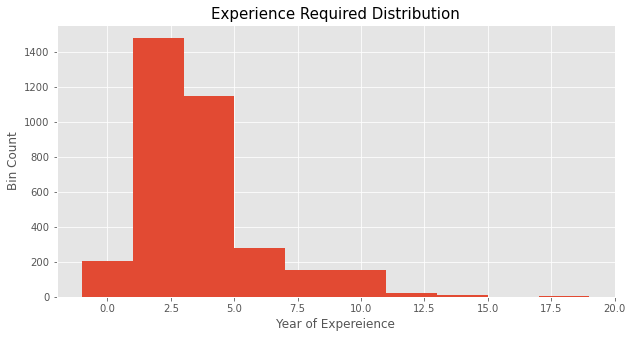

The average year of experience required is 4.23 years


In [169]:
plt.figure(figsize = (10,5))
plt.hist(experience_req,bins = list(range(0,21,2)), align = 'left')
plt.title('Experience Required Distribution', size = 15)
plt.ylabel('Bin Count')
plt.xlabel('Year of Expereience', size = 12)
plt.show()
print(f'The average year of experience required is {round(np.mean(experience_req),2)} years')

## Skill requirements
- Some of the key skill requiremt in the jd

In [170]:
# Create a regex search function
def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [171]:
# Create a data frame with skills name and regex pattern to search with
skills = ['R','Python','Hadoop','SQL','SPSS','SCALA','Tableau','TensorFlow','Agile','Power BI','SSaS','Algorithm','Java','Visualization']

skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*', '(?i)SPSS\w*', '(?i)SCALA\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSSAS\W?","(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?']

skill_df =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

In [172]:
# Iterate through the list of skill using the search function created
i = []
for x in skill_df['regex_pattern']:
    i.append(count_text(x,text))
skill_df['count'] = i
skill_df['ptg'] = round(skill_df['count']/len(text),2)
skill_df

,skill,regex_pattern,count,ptg
0,R,\WR\W+\s*,0,0.00
1,Python,(?i)\WPython\W,2928,0.76
2,Hadoop,(?i)\WHadoop\W?,1015,0.26
3,SQL,(?i)SQL\w*,2151,0.56
4,SPSS,(?i)SPSS\w*,239,0.06
5,SCALA,(?i)SCALA\w*,849,0.22
6,Tableau,(?i)\WTableau\W?,766,0.20
7,TensorFlow,(?i)\WTensorFlow\W?,484,0.13
8,Agile,(?i)\WAgile\W?,465,0.12
9,Power BI,(?i)\WPower\s?BI\W?,221,0.06


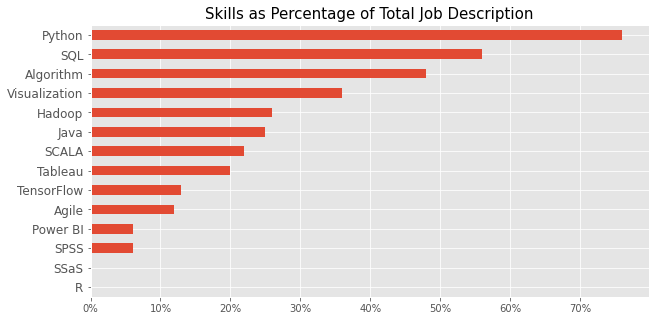

In [173]:
x = skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Skills as Percentage of Total Job Description', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

In [174]:
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
df['description']

0       read what people are saying about working here. \n\nwe are farmers!\n\njoin a team of diverse professionals at farmers to acquire skills on the job and apply your learned knowledge to future roles at farmers. farmers insurance also offers extensive training opportunities through the award winning university of farmers named by training magazine amongst top 10 corporate training units in the world. start your career at farmers today!\n\njob summary\n\nthe enterprise data scientist i will be a valuable part of the data science team who provide statistical analysis, modeling, and vis ualizati...
1       we have an immediate opening for a sharp data scientist with a strong mathematical/statistical background to work on various initiatives in a huge data environment. will be looking at various formats of data dealing with billing fraud patterns using various software and modeling techniques. the candidate should have a minimum of 3 years of solid work experience in a professional or

In [176]:
df.isnull().sum()

position       0
description    0
company        0
dtype: int64

## Remove emails and newline characters
You can see many emails, newline characters and extra spaces in the text and it is quite distracting. Let’s get rid of them using regular expressions.
`https://www.machinelearningplus.com/python/python-regex-tutorial-examples/`
`https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/`

In [178]:
# Convert to list
data = df.description.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['read what people are saying about working here. we are farmers! join a team '
 'of diverse professionals at farmers to acquire skills on the job and apply '
 'your learned knowledge to future roles at farmers. farmers insurance also '
 'offers extensive training opportunities through the award winning university '
 'of farmers named by training magazine amongst top 10 corporate training '
 'units in the world. start your career at farmers today! job summary the '
 'enterprise data scientist i will be a valuable part of the data science team '
 'who provide statistical analysis, modeling, and vis ualization services for '
 'all lines of business and all shared service functions at farmers insurance '
 'group. the data scientist 1 will work on end to end solutions as part of a '
 'team. they will design innovative analytic models and will be responsible '
 'for pulling and cleaning datasets, evaluating models, and presenting results '
 'to internal teams. essential job functions extrac

In [179]:
type(data)

list

## Tokenize and Clean-up using gensim’s simple_preprocess()
- The sentences look better now, but you want to tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

- Gensim’s simple_preprocess() is great for this. Additionally I have set deacc=True to remove the punctuations.

In [180]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(type(data_words))

<class 'list'>


## Creating Bigram and Trigram Models

In [181]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['read', 'what', 'people', 'are', 'saying', 'about', 'working', 'here', 'we', 'are', 'farmers', 'join', 'team', 'of', 'diverse', 'professionals', 'at', 'farmers', 'to', 'acquire', 'skills', 'on', 'the', 'job', 'and', 'apply', 'your', 'learned', 'knowledge', 'to', 'future', 'roles', 'at', 'farmers', 'farmers', 'insurance', 'also', 'offers', 'extensive', 'training', 'opportunities', 'through', 'the', 'award_winning', 'university', 'of', 'farmers', 'named', 'by', 'training', 'magazine', 'amongst', 'top', 'corporate', 'training', 'units', 'in', 'the', 'world', 'start', 'your', 'career', 'at', 'farmers', 'today', 'job', 'summary', 'the', 'enterprise', 'data', 'scientist', 'will', 'be', 'valuable', 'part', 'of', 'the', 'data', 'science', 'team', 'who', 'provide', 'statistical', 'analysis', 'modeling', 'and', 'vis', 'ualization', 'services', 'for', 'all', 'lines', 'of', 'business', 'and', 'all', 'shared', 'service', 'functions', 'at', 'farmers', 'insurance', 'group', 'the', 'data', 'scientist

In [182]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [189]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    stopwords =[[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    stopwords.extend(['experience','learning','work','scientist','employment','opportunity',
                   'datum','science','team','year','-PRON-','religion','identity','sexual','orientation','veteran',
                   'status','equal','national','gender','expression','real','affirmative',
                    'race', 'color','age', 'belief', 'chance', 'disability', 'ethnic',
                    'fair', 'nationality','ordinance', 'ordinances', 'origin', 'policy',
                     'skill','year''prohibited','sex','kind','equal','opportunity',
                     'employer', 'committed','strength','diverse','workforce',
                    'read','people','saying','working','farmers','join','diverse',
                    'professionals', 'acquire', 'skills', 'apply','learned',
                    'knowledge','future','roles','offers', 'extensive',
                    'training', 'opportunities','award', 'winning', 'training',
                    'magazine', 'corporate','world','blackrock','financial','fudiciary',
                     'read', 'people', 'say', 'work', 'farmer', 'join', 'diverse', 'professional', 
                    'farmer', 'acquire', 'skill', 'job', 'apply', 'learn', 'knowledge', 'future',
                    'role', 'farmers', 'farmers', 'insurance', 'also', 'offer', 'extensive', 
                    'award_winning','university', 'farmer', 'name', 
                      'train', 'magazine', 'amongst', 'top', 'corporate' ])
    return stopwords

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

### Remove Stopwords, Make Bigrams and Lemmatize

In [190]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['read', 'what', 'people', 'are', 'saying', 'about', 'working', 'here', 'we', 'are', 'farmers', 'join', 'team', 'of', 'diverse', 'professionals', 'at', 'farmers', 'to', 'acquire', 'skills', 'on', 'the', 'job', 'and', 'apply', 'your', 'learned', 'knowledge', 'to', 'future', 'roles', 'at', 'farmers', 'farmers', 'insurance', 'also', 'offers', 'extensive', 'training', 'opportunities', 'through', 'the', 'award_winning', 'university', 'of', 'farmers', 'named', 'by', 'training', 'magazine', 'amongst', 'top', 'corporate', 'training', 'units', 'in', 'the', 'world', 'start', 'your', 'career', 'at', 'farmers', 'today', 'job', 'summary', 'the', 'enterprise', 'data', 'scientist', 'will', 'be', 'valuable', 'part', 'of', 'the', 'data', 'science', 'team', 'who', 'provide', 'statistical', 'analysis', 'modeling', 'and', 'vis', 'ualization', 'services', 'for', 'all', 'lines', 'of', 'business', 'and', 'all', 'shared', 'service', 'functions', 'at', 'farmers', 'insurance', 'group', 'the', 'data', 'scientist

In [191]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[:1])

[['read', 'people', 'say', 'work', 'farmer', 'join', 'diverse', 'professional', 'farmer', 'acquire', 'skill', 'job', 'apply', 'learn', 'knowledge', 'future', 'role', 'farmers', 'farmers', 'insurance', 'also', 'offer', 'extensive', 'training', 'opportunity', 'award_winning', 'university', 'farmer', 'name', 'train', 'magazine', 'amongst', 'top', 'corporate', 'training', 'unit', 'world', 'start', 'career', 'farmer', 'today', 'job', 'summary', 'enterprise', 'datum', 'valuable', 'part', 'datum', 'provide', 'statistical', 'analysis', 'model', 'vis', 'ualization', 'service', 'line', 'business', 'share', 'service', 'function', 'farmers', 'insurance', 'group', 'datum', 'end', 'end', 'solution', 'part', 'design', 'innovative', 'analytic', 'model', 'responsible', 'pull', 'cleaning', 'dataset', 'evaluate', 'model', 'present', 'result', 'internal', 'team', 'essential', 'job', 'function', 'extract', 'data', 'variety', 'source', 'database', 'web', 'text', 'file', 'variety', 'format', 'structure', 'un

In [192]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 4), (37, 1), (38, 1), (39, 7), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 5), (63, 4), (64, 2), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 3), (79, 1), (80, 1), (81, 1), (82, 1), (83, 4), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 3), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 4), (100, 1), (101, 1), (102, 1), (103, 1), (104, 3), (105, 1), (106, 1), (107, 2), (108, 1), (109, 2), (110, 1)

### Building the Topic Model

In [193]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [194]:
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"research" + 0.011*"require" + 0.011*"position" + 0.009*"include" + '
  '0.008*"must" + 0.007*"information" + 0.007*"requirement" + 0.007*"program" '
  '+ 0.007*"support" + 0.007*"may"'),
 (1,
  '0.034*"datum" + 0.021*"data" + 0.021*"machine" + 0.010*"skill" + '
  '0.010*"use" + 0.009*"year" + 0.009*"model" + 0.009*"computer" + '
  '0.009*"python" + 0.009*"technology"'),
 (2,
  '0.020*"status" + 0.014*"disability" + 0.011*"veteran" + 0.010*"equal" + '
  '0.009*"employer" + 0.009*"sexual_orientation" + 0.009*"national_origin" + '
  '0.009*"-PRON-" + 0.008*"protect" + 0.008*"gender_identity"'),
 (3,
  '0.018*"product" + 0.016*"datum" + 0.010*"data" + 0.009*"business" + '
  '0.009*"build" + 0.009*"model" + 0.009*"customer" + 0.009*"help" + '
  '0.008*"new" + 0.007*"drive"'),
 (4,
  '0.030*"datum" + 0.021*"business" + 0.018*"data" + 0.015*"analytic" + '
  '0.011*"analysis" + 0.010*"model" + 0.009*"ability" + 0.009*"use" + '
  '0.009*"skill" + 0.008*"develop"')]


## Inference : 
4 Possible Topics we can infer from about results:
    - 0 Topic - Junior position based more on research, gathering requirements and giving support
    - 1 Topic- Skill requirement like machine learning, computer python and technology
    - 2 Topic - Employee related - status, Disability, gender-identity , nationality
    - 3 Topic - Product and Business role, cutomer  focussed
    - 4 Topic - Business Analytic role with model and development exprience 
